In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('Default.xlsx')

C:\Users\wasim\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
data=data.drop(['Unnamed: 0'],axis=1)

In [4]:
data.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [5]:
data.shape

(10000, 4)

In [6]:
data['default']=data.default.replace({'No':0,'Yes':1})
data['student']=data.student.replace({'No':0,'Yes':1})

In [7]:
data.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [8]:
data.insert(2,'intercept',np.ones(data.shape[0],dtype='i'))

In [9]:
data.head()

,default,student,intercept,balance,income
0,0,0,1,729.526495,44361.625074
1,0,1,1,817.180407,12106.134700
2,0,0,1,1073.549164,31767.138947
3,0,0,1,529.250605,35704.493935
4,0,0,1,785.655883,38463.495879


In [10]:
x=data.iloc[:,2:4]
y=data.iloc[:,0]

In [11]:
x

,intercept,balance
0,1,729.526495
1,1,817.180407
2,1,1073.549164
3,1,529.250605
4,1,785.655883
...,...,...
9995,1,711.555020
9996,1,757.962918
9997,1,845.411989
9998,1,1569.009053


In [12]:
def split_data(x,y,frac=0.8):
    x_train=x.sample(frac=0.8)
    x_test=x.drop(x_train.index)
    y_train=y.sample(frac=0.8)
    y_test=y.drop(y_train.index)
    return x_train, x_test, y_train, y_test

In [13]:
x_train, x_test, y_train, y_test=split_data(x,y,0.8)

In [14]:
x_train.shape

(8000, 2)

In [15]:
def hypothesis(x,beta):
    z = np.dot(beta, np.transpose(x))
     
    return 1/(1+np.exp(-(z)))

In [16]:
def cost(x,y,beta):
    y_pred=hypothesis(x,beta)
    return -1/(len(x))*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))

In [17]:
def gradient_decent(x,y,beta,alpha,itretion):
    j=[]
    for i in range(itretion):
        h=hypothesis(x,beta)
        for i in range(len(x.columns)):
            beta[i] -= (alpha/len(x)) * np.sum((h-y)*x.iloc[:, i])
        j.append(cost(x,y,beta))
    return j ,beta

In [18]:
'''def predict(x,y,beta,alpha,itretion):
    j,beta=gradient_decent(x,y,beta,alpha,itretion)
    h=hypothesis(x,beta)
    h1=[]
    for i in range(len(h)):
        if h[i]>=0.5:
            h1.append(1)
        else:
            h1.append(0)
    acc = np.sum([y[i] == h1[i] for i in range(len(y))])/len(y)
    return h1,acc'''                  
            

'def predict(x,y,beta,alpha,itretion):\n    j,beta=gradient_decent(x,y,beta,alpha,itretion)\n    h=hypothesis(x,beta)\n    h1=[]\n    for i in range(len(h)):\n        if h[i]>=0.5:\n            h1.append(1)\n        else:\n            h1.append(0)\n    acc = np.sum([y[i] == h1[i] for i in range(len(y))])/len(y)\n    return h1,acc'

In [19]:
def predict(x,y,beta,alpha,itretion):
    j, beta = gradient_decent(x,y,beta,alpha,itretion) 
    h = hypothesis(x, beta)
    #h1=[]
    for i in range(len(h)):
        h[i]=1 if h[i]>=0.5 else 0
        '''if h[i]>=0.5:
            h1.append(1)
        else:
            h1.append(0)'''
    y = list(y)
    acc = np.sum([y[i] == h[i] for i in range(len(y))])/len(y)
    return j, acc,

In [20]:
beta = [0.5]*len(x.columns)
j,acc = predict(x_train, y_train, beta, 0.0001, 5000)

<ipython-input-16-635739f20446>:3: RuntimeWarning: divide by zero encountered in log
  return -1/(len(x))*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))


In [22]:
beta

[0.4842058416810596, -0.007915248781282821]

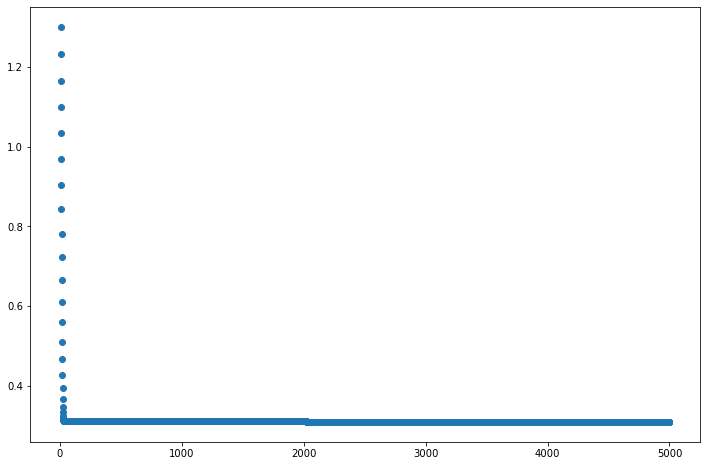

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(j)), j)
plt.show()

In [29]:
j,accu = predict(x_test, y_test, beta, 0.0001, 15000)

In [30]:
accu

0.9045